In [3]:
import sys
import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [10]:
# simple plotting script for eps vs eta and ueta vs eta for different taus

# Plotting script to compare across different smoothing values
# The solution adapts to the number of smoothing values in heta; there must be > 1 value in the list
# or the code will have to be edited

def splot():
    h = 0.1
    rk = 2
    taus = ['1.0', '1.2', '2.0']
    dpi=300
    A0 = 4.633
    dt=.001
    fig, ax = plt.subplots(1,2,figsize=np.array([15,5]), sharex=True,gridspec_kw={'wspace':.5})
    col_names_a=['x', 'y', 'eta', 'eps', 'rhoB', 'rhoS', 'rhoQ', 'ux', 'uy', 'ueta','Bulk', 'Pixx', 'Pixy', 'Pixeta', 'Piyy', 'Piyeta', 'Pietaeta']
    col_names_s=['id','tau', 'eta', 'p', 'T', 'muB', 'muS', 'muQ', 'eps', 'rhoB',
               'rhoS', 'rhoQ', 's', 'smoothed_s', 'specific_s', 'sigma',
               'norm_spec_s', 'stauRelax', 'bigtheta', "??", "??2",
               'shv00', 'shv11', 'shv22', 'hydro_shv12', 't^2 shv33', 
               'v_eta', 'gamma', 'freeze', 'eos_name']
    for t in taus:
        # reading in and plotting analytical solution
        inp_path_a = os.path.join('long/Analytical','long_tau_'+t+'.dat')
        dfa = pd.read_table(inp_path_a, names=col_names_a, sep=" ", header=1, index_col = False)
        dfa['T'] = (dfa['eps']/3/A0)**(1/4)
        ax[0].plot(dfa['eta'], dfa['eps'], color='blue', label='Analytical' if t == taus[0] else "")
        ax[1].plot(dfa['eta'], dfa['ueta'], color='blue', label='Analytical' if t == taus[0] else "")

        # reading in and plotting CCAKE solution
        idx = int(np.round((float(t)-1)/dt)/100) # calculating the system_state id number based on dt
        inp_path_s = os.path.join(f'long/Sim/h_{h}/rk{rk}',f'system_state_{idx}.dat')
        dfs = pd.read_table(inp_path_s,
                           names=col_names_s,sep=' ',header=1)
        dfs['ueta'] = dfs.loc[:,'v_eta']*dfs.loc[:,'gamma']
        ax[0].plot(dfs['eta'], dfs['eps'] / 1000, color='red', ls='--', label='CCAKE' if t == taus[0] else "")
        ax[1].plot(dfs['eta'], dfs['ueta'], color='red', ls='--', label='CCAKE' if t == taus[0] else "")

        ax[0].text(dfa['eta'].iloc[1200], dfa['eps'].iloc[1100], rf'$\tau$ = {t}', color='black', va='center')
        ax[1].text(dfa['eta'].iloc[-1], dfa['ueta'].iloc[-1], rf'$\tau$ = {t}', color='black', va='center')


        ax[0].legend()
        ax[1].legend()

        ax[1].set_ylabel(r"$u^{\eta}$")
        ax[0].set_ylabel(r"${\epsilon}$")
        ax[0].set_xlabel(r"${\eta}$")
        ax[1].set_xlabel(r"${\eta}$")


        ax[0].set_title(f'h = {h}; rk = {rk}')
        ax[1].set_title(f'h = {h}; rk = {rk}')


        ax[0].legend()
        ax[1].legend()


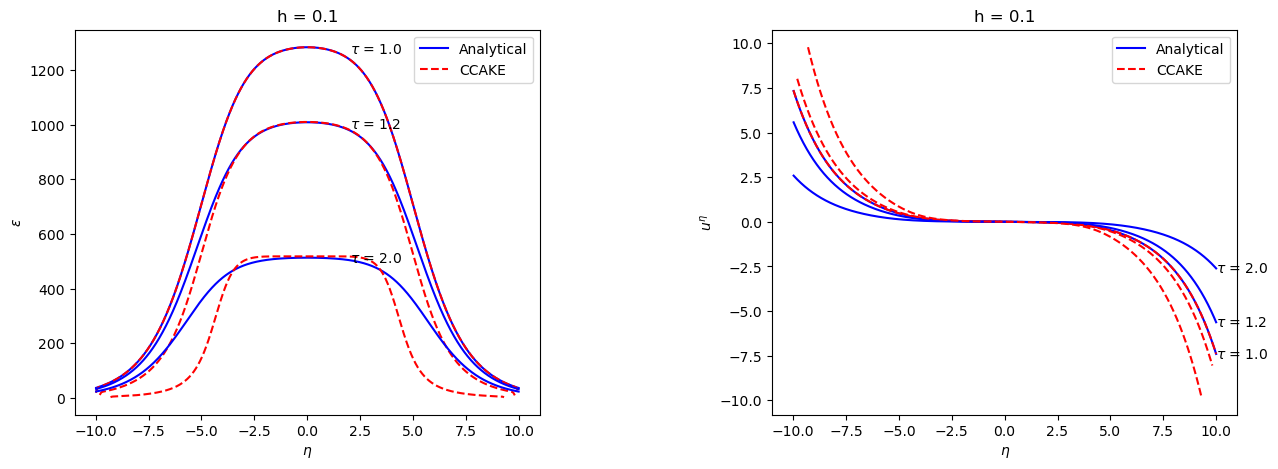

In [9]:
splot()